### **Is there a linear relationship between a kicker and his teams' success?**


Below, you will see my research project where I evaluated the relationship between a kicker and his teams' success. This was extremely interesting to me because I was interested in seeing the effect that NFL kickers had on their team's success. I also wanted to know how big the difference was between the best kickers and the worst kickers. I used play-by-play data and game summary data from the 2013 NFL season.

First, let's install tidyverse and read in the play-by-play NFL data. We will be using the following variables in the plays.csv:

**kicker_player_name:** Kicker's name

**field_goal_attempt:** A "1" represents that there was a field goal attempt. A "0" represents no field goal attempt

**field_goal_result:** Result of the field goal kick. "Missed" means the field goal was no good. "Blocked" means the field goal was blocked and therefore no good. "Made" means that the field goal was good.

**kick_distance:** The distance (in yards) of the field goal kicked

**posteam:** Team that has possession of the ball


In [ ]:
options(warn = -1)
options(repr.plot.width = 20, repr.plot.height = 12)
install.packages('tidyverse')
install.packages('stringr')
library(tidyverse)
library(stringr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
plays = read.csv('plays (1).csv')
kickers = plays %>% select(kicker_player_name,field_goal_attempt,field_goal_result,posteam) %>%
            filter(field_goal_attempt==1)
kickers %>% head()

,kicker_player_name,field_goal_attempt,field_goal_result,posteam
,<chr>,<int>,<chr>,<chr>
1,J.Tucker,1,made,BAL
2,J.Tucker,1,made,BAL
3,S.Gostkowski,1,made,NE
4,S.Gostkowski,1,made,NE
5,S.Gostkowski,1,made,NE
6,R.Bironas,1,made,TEN


Below, you will see that I calculated all of the made field goals from each kicker during the 2013 NFL season. The "n" value represents the total number of field goals made for that respective kicker during the 2013 NFL season. As you can see Justin Tucker and Stephen Gostkowski made the most field goals during the 2013 NFL season.

In [ ]:
kickers_makes = kickers %>%
mutate(FG_Made = case_when(field_goal_result == 'made' ~ 1,
      field_goal_result == 'missed' | field_goal_result =='blocked' ~ 0)) %>%
      filter(!is.na(field_goal_result))  %>% group_by(kicker_player_name,FG_Made,posteam) %>%
      summarize(n = n()) %>% filter(FG_Made==1)  %>% arrange(desc(n))
kickers_makes %>% head()

`summarise()` has grouped output by 'kicker_player_name', 'FG_Made'. You can override using the `.groups` argument.



kicker_player_name,FG_Made,posteam,n
<chr>,<dbl>,<chr>,<int>
J.Tucker,1,BAL,38
S.Gostkowski,1,NE,38
A.Vinatieri,1,IND,35
N.Novak,1,SD,34
D.Carpenter,1,BUF,33
M.Crosby,1,GB,33


Below, I calculated Field Goal Misses for each kicker by subtracting attempts by made field goals. By looking at this data, we can see that Matt Prater missed the least field goals for the 2013 season in the NFL. Also, I calculated the Field Goal percentage for each kicker, which was calculated by (FG_Makes / FG_Attempts). Matt Prater had the highest FG Percentage during the 2013 NFL season.

`summarise()` has grouped output by 'kicker_player_name'. You can override using the `.groups` argument.

Adding missing grouping variables: `FG_Made`



# A tibble: 32 × 7
# Groups:   kicker, FG_Made [32]
   FG_Made kicker       FG_Makes FG_Misses FG_Attempts FG_Percentage Team 
     <dbl> <chr>           <int>     <int>       <int>         <dbl> <chr>
 1       1 M.Prater           25         1          26         0.962 DEN  
 2       1 S.Hauschka         33         2          35         0.943 SEA  
 3       1 S.Suisham          30         2          32         0.938 PIT  
 4       1 D.Bailey           28         2          30         0.933 DAL  
 5       1 G.Zuerlein         26         2          28         0.929 STL  
 6       1 J.Tucker           38         3          41         0.927 BAL  
 7       1 S.Gostkowski       38         3          41         0.927 NE   
 8       1 N.Novak            34         3          37         0.919 SD   
 9       1 D.Carpenter        33         3          36         0.917 BUF  
10       1 N.Folk             33         3          36         0.917 NYJ  
# … with 22 more rows


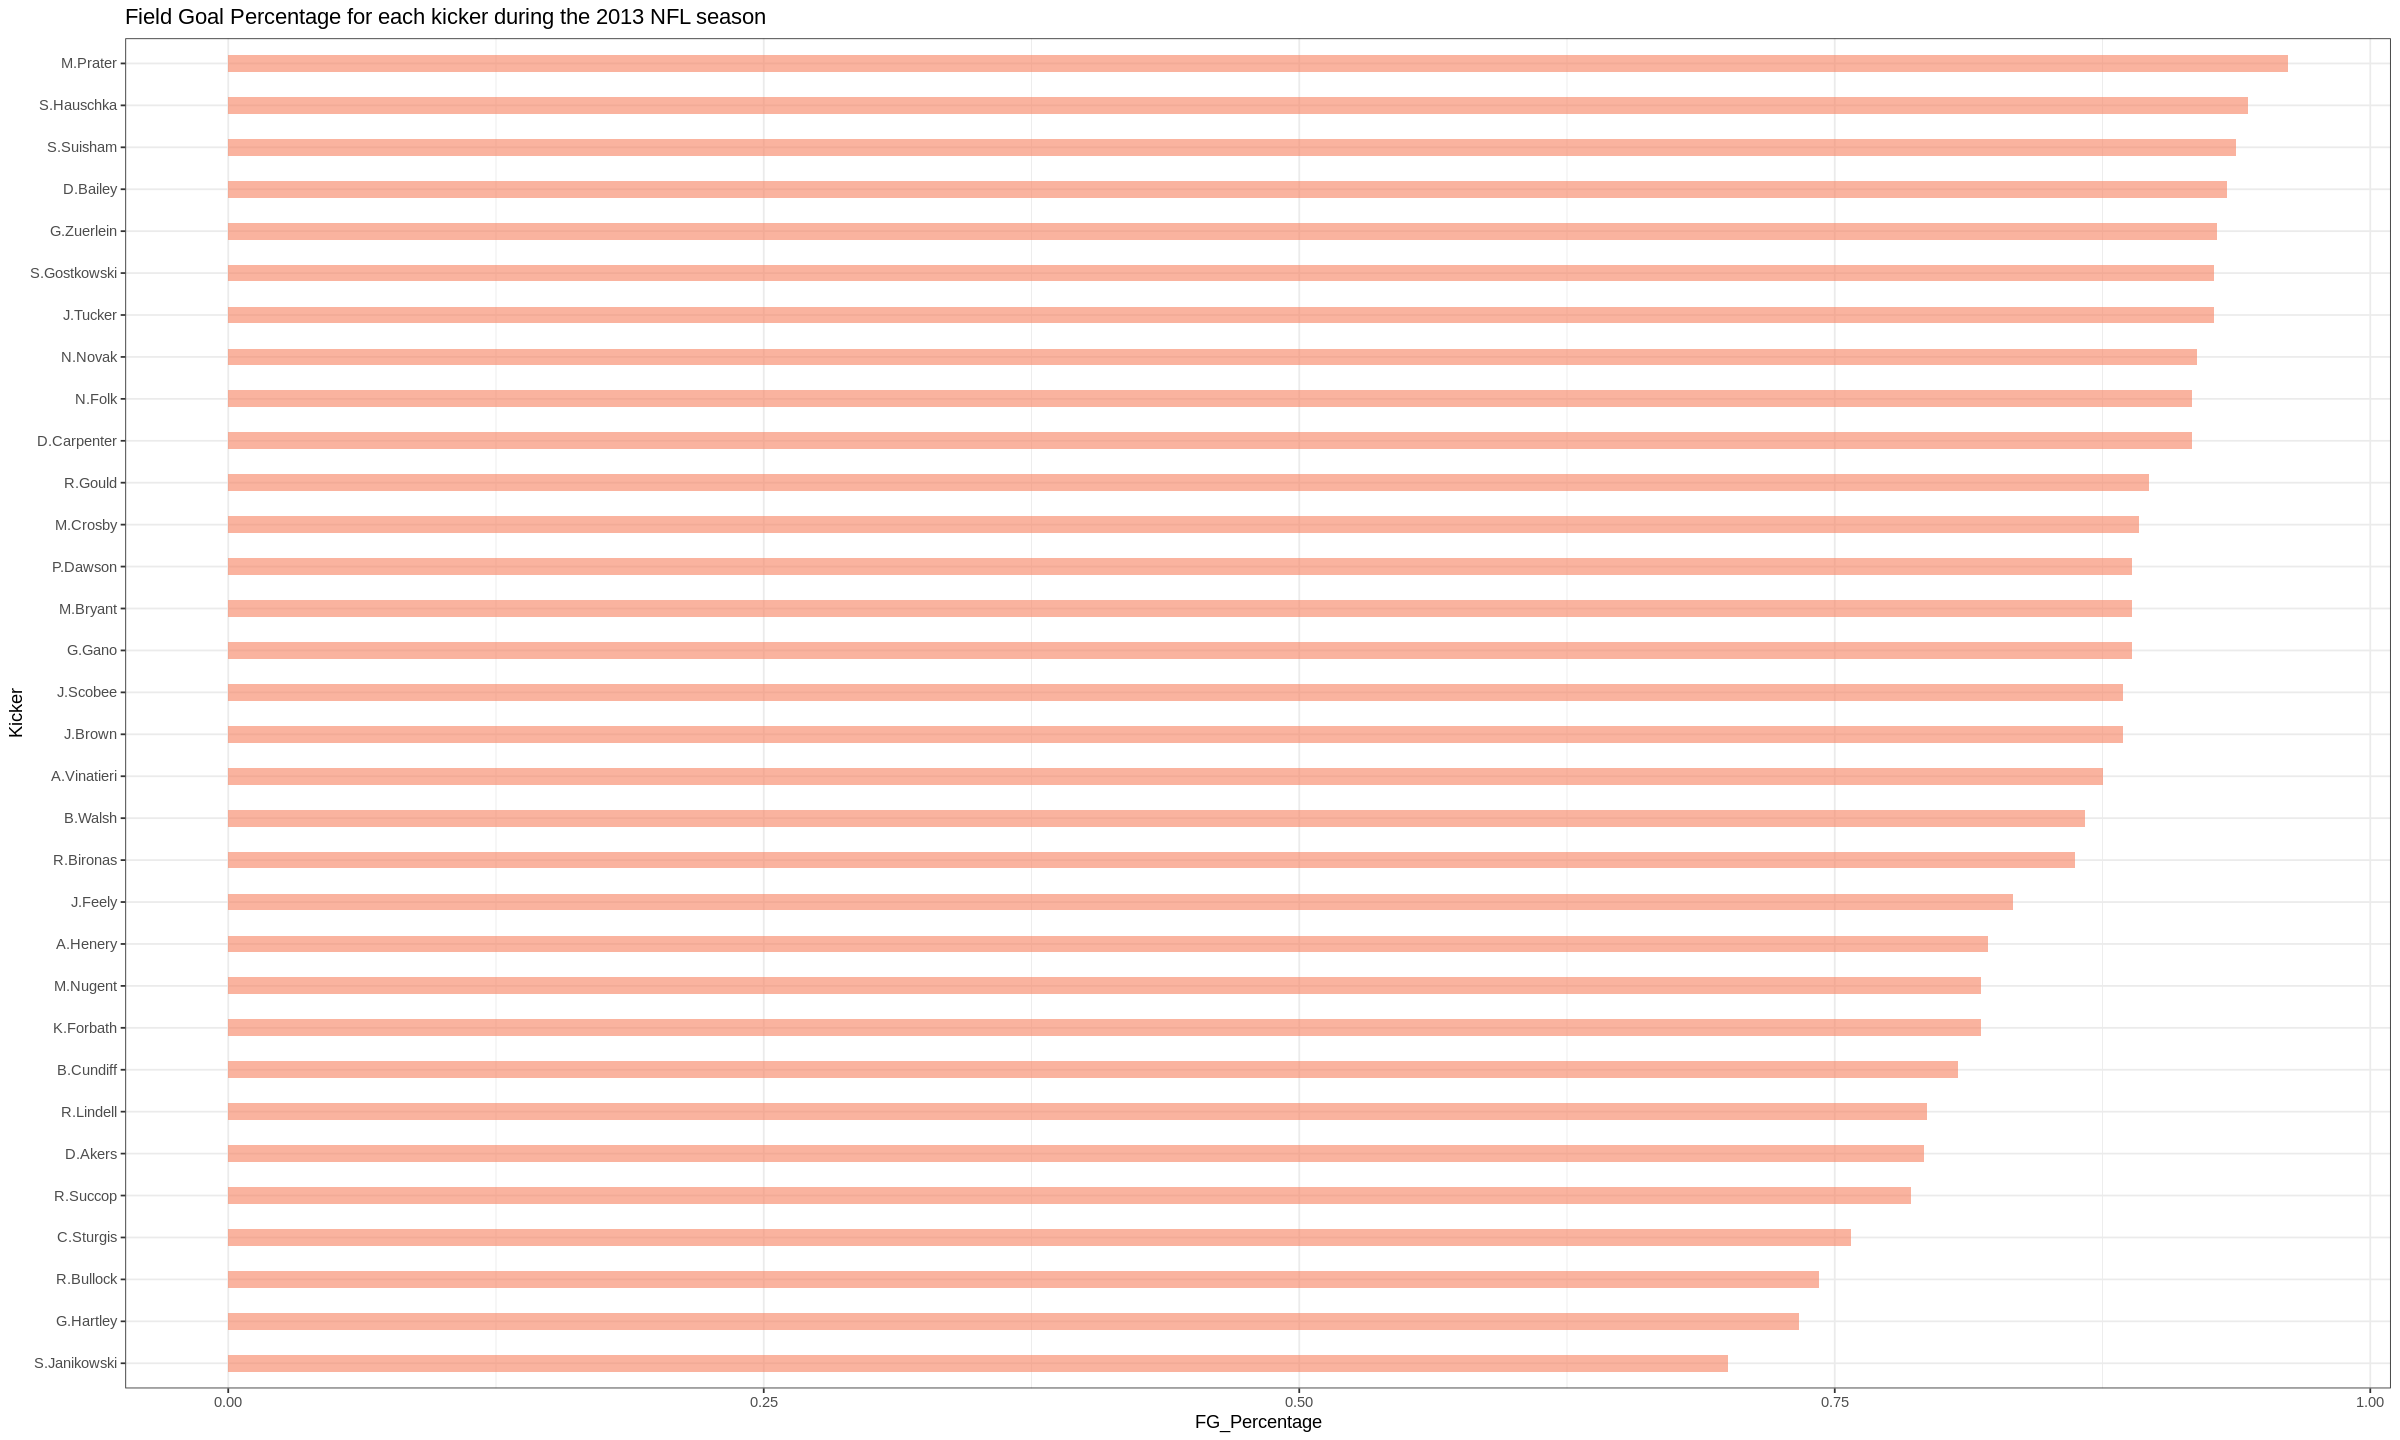

In [ ]:

kickers_attempts = kickers %>%
mutate(FG_Made = case_when(field_goal_result == 'made' ~ 1,
      field_goal_result == 'missed' | field_goal_result =='blocked' ~ 0)) %>%
      filter(!is.na(field_goal_result))  %>% group_by(kicker_player_name,posteam) %>%
      summarize(n = n())

Joining = left_join(kickers_makes,kickers_attempts,by="kicker_player_name") %>%
rename(FG_Makes = n.x,FG_Attempts = n.y,
            kicker = kicker_player_name,Team =posteam.x) %>% mutate(FG_Misses = FG_Attempts - FG_Makes,
            FG_Percentage = FG_Makes / FG_Attempts) %>%
  select(kicker,FG_Makes,FG_Misses,FG_Attempts,FG_Percentage,Team) %>% arrange(desc(FG_Percentage)) %>%
  filter(FG_Attempts > 5)  %>% print


Joining %>% ggplot(aes(x=reorder(kicker, FG_Percentage), y=FG_Percentage))+geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) +
    coord_flip() +
    xlab("Kicker") + ggtitle("Field Goal Percentage for each kicker during the 2013 NFL season")+
    theme_bw()

This bar graph above represents that Matt Prater was the most successful kicker in the 2013 NFL season in regards to makes and misses. The x-axis shows the success rate of each field goal kicker. This graph does not take into account the best kickers at a certain distance which I will look into towards the end of this report.

Below, I calculated the win percentage of every NFL team during the 2013 NFL season. I used the games.csv dataset. I did not use ties in this dataset. The variables that we will be using are the following:

**home_score:** score of the home team

**away_score:** score of the away team

**home_abb:** the abbreviation of the home team

**away_abb:** the abbreviation of the away team

**season:** the year of the NFL season

We can see that Denver Broncos and Seattle Seahawks had the best records during the 2013 NFL season and would wind up going to the super bowl that year as well. This proves that records do matter in the NFL for the playoffs!

In [ ]:
games = read.csv('games.csv')
  W = games%>% filter(home_score !=away_score) %>% filter(season==2013) %>%
  mutate(Winning_Team = ifelse(home_score > away_score, home_abb, away_abb), Losing_Team=(ifelse(home_score > away_score, away_abb, home_abb))) %>%
  group_by(Winning_Team) %>% count() %>% rename(Team=Winning_Team,Wins=n)
head(W)
L = games%>% filter(home_score !=away_score) %>% filter(season==2013) %>%
  mutate(Winning_Team = ifelse(home_score > away_score, home_abb, away_abb), Losing_Team=(ifelse(home_score > away_score, away_abb, home_abb))) %>%
  group_by(Losing_Team) %>% count() %>% rename(Team=Losing_Team,Losses=n)
head(L)
Records = left_join(W,L,by="Team") %>% mutate(winning_pct = Wins/(Wins+Losses)) %>% arrange(desc(winning_pct)) %>% print

Team,Wins
<chr>,<int>
ARI,10
ATL,4
BAL,8
BUF,6
CAR,12
CHI,8


Team,Losses
<chr>,<int>
ARI,6
ATL,12
BAL,8
BUF,10
CAR,4
CHI,8


# A tibble: 32 × 4
# Groups:   Team [32]
   Team   Wins Losses winning_pct
   <chr> <int>  <int>       <dbl>
 1 DEN      13      3       0.812
 2 SEA      13      3       0.812
 3 CAR      12      4       0.75 
 4 NE       12      4       0.75 
 5 SF       12      4       0.75 
 6 CIN      11      5       0.688
 7 IND      11      5       0.688
 8 KC       11      5       0.688
 9 NO       11      5       0.688
10 ARI      10      6       0.625
# … with 22 more rows


In [ ]:
Total =left_join(Joining,Records,by="Team") %>% select(Team,kicker,FG_Makes,FG_Misses,FG_Attempts,FG_Percentage,winning_pct) %>%print
summary(lm(winning_pct ~ FG_Percentage,data=Total))


Adding missing grouping variables: `FG_Made`



# A tibble: 32 × 8
# Groups:   kicker, FG_Made [32]
   FG_Made Team  kicker FG_Makes FG_Misses FG_Attempts FG_Percentage winning_pct
     <dbl> <chr> <chr>     <int>     <int>       <int>         <dbl>       <dbl>
 1       1 DEN   M.Pra…       25         1          26         0.962       0.812
 2       1 SEA   S.Hau…       33         2          35         0.943       0.812
 3       1 PIT   S.Sui…       30         2          32         0.938       0.5  
 4       1 DAL   D.Bai…       28         2          30         0.933       0.5  
 5       1 STL   G.Zue…       26         2          28         0.929       0.438
 6       1 BAL   J.Tuc…       38         3          41         0.927       0.5  
 7       1 NE    S.Gos…       38         3          41         0.927       0.75 
 8       1 SD    N.Nov…       34         3          37         0.919       0.562
 9       1 BUF   D.Car…       33         3          36         0.917       0.375
10       1 NYJ   N.Folk       33         3          36   


Call:
lm(formula = winning_pct ~ FG_Percentage, data = Total)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27775 -0.14031 -0.04534  0.17630  0.31408 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)    -0.3541     0.4156  -0.852   0.4009  
FG_Percentage   0.9921     0.4814   2.061   0.0481 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1848 on 30 degrees of freedom
Multiple R-squared:  0.124,	Adjusted R-squared:  0.09483 
F-statistic: 4.248 on 1 and 30 DF,  p-value: 0.04806


After joining the winning percentage of each team data with their respective kicker, I used linear regression to see if there was a relationship between a kicker's Field Goal percentage and their team's winning percentage.

Looking at the summary of the linear regression, we can see that the adjusted R-Squared value is .09483. This reveals that about 9.4% of the variation in this dataset can be accounted for by this model. Also, our p-value was below .05 indicating our data is significant at the 95% confidence level. Moreover, the low r-squared value reveals that there is little to no relationship in our model.

Lastly, we can say that for every increase in about 99.21% of winning percentage, the FG percentage of a kicker increased by 1%. This further indicates that there is no relationship between a kicker's success and their respective teams' winning percentage.


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



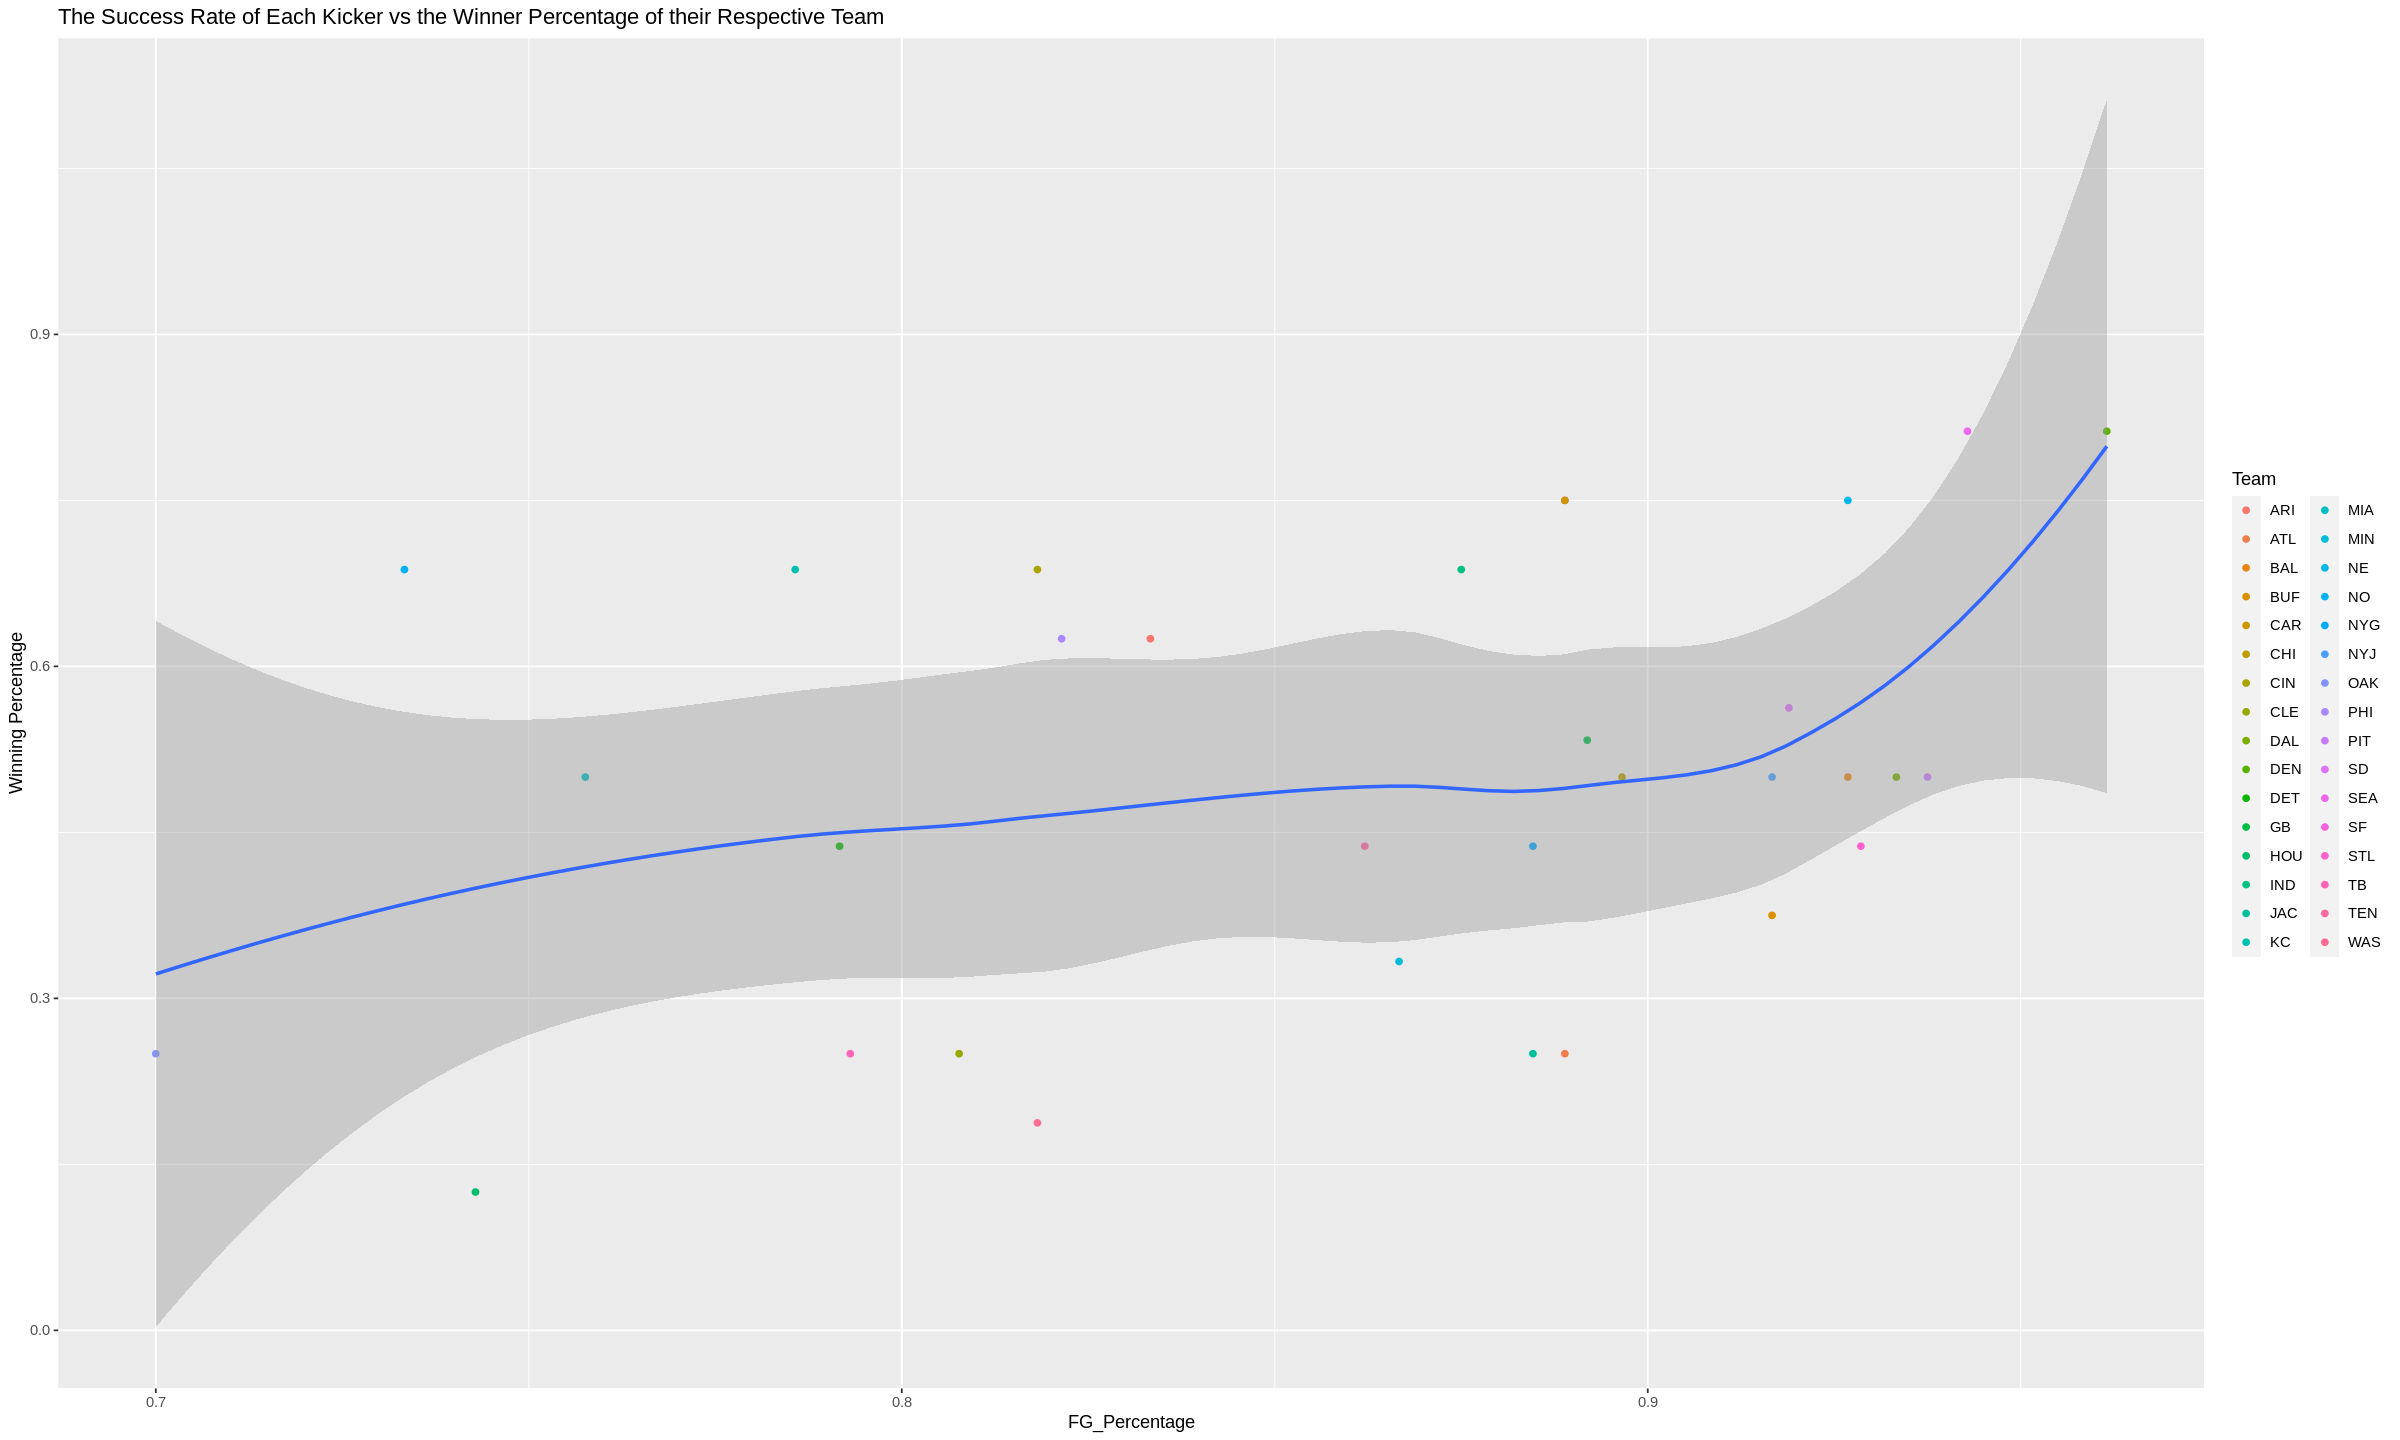

In [ ]:
ggplot(Total) + geom_point(aes(x=FG_Percentage,y=winning_pct,color=Team)) +
  geom_smooth(aes(x=FG_Percentage,y=winning_pct)) + labs(y="Winning Percentage",
  title="The Success Rate of Each Kicker vs the Winner Percentage of their Respective Team")


By looking at our line of best fit, we can see that there is a weak positive relationship between a kicker's success rate and his respective team. The different colors of the points on the scatterplot represent the teams that the kickers play for. This scatterplot is significant because it reveals that there is a weak relationship between the two variables of Field Goal Percentage and the kicker's respective team's winning percentage.


`summarise()` has grouped output by 'kicker_player_name', 'FG_Made'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'kicker_player_name'. You can override using the `.groups` argument.

Adding missing grouping variables: `FG_Made`

Adding missing grouping variables: `FG_Made`



# A tibble: 25 × 8
# Groups:   kicker, FG_Made [25]
   FG_Made Team  kicker FG_Makes FG_Misses FG_Attempts FG_Percentage winning_pct
     <dbl> <chr> <chr>     <int>     <int>       <int>         <dbl>       <dbl>
 1       1 SD    N.Nov…        6         0           6         1           0.562
 2       1 BAL   J.Tuc…       10         1          11         0.909       0.5  
 3       1 DEN   M.Pra…        9         1          10         0.9         0.812
 4       1 DAL   D.Bai…        8         1           9         0.889       0.5  
 5       1 SEA   S.Hau…        6         1           7         0.857       0.812
 6       1 IND   A.Vin…       11         2          13         0.846       0.688
 7       1 NE    S.Gos…       10         2          12         0.833       0.75 
 8       1 ARI   J.Fee…        9         2          11         0.818       0.625
 9       1 NYJ   N.Folk        8         2          10         0.8         0.5  
10       1 CAR   G.Gano        7         2           9   


Call:
lm(formula = winning_pct ~ FG_Percentage, data = Total2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28728 -0.12922 -0.03526  0.16904  0.36441 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)    0.05005    0.19465   0.257   0.7994  
FG_Percentage  0.63709    0.26313   2.421   0.0238 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.191 on 23 degrees of freedom
Multiple R-squared:  0.2031,	Adjusted R-squared:  0.1685 
F-statistic: 5.862 on 1 and 23 DF,  p-value: 0.02376


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



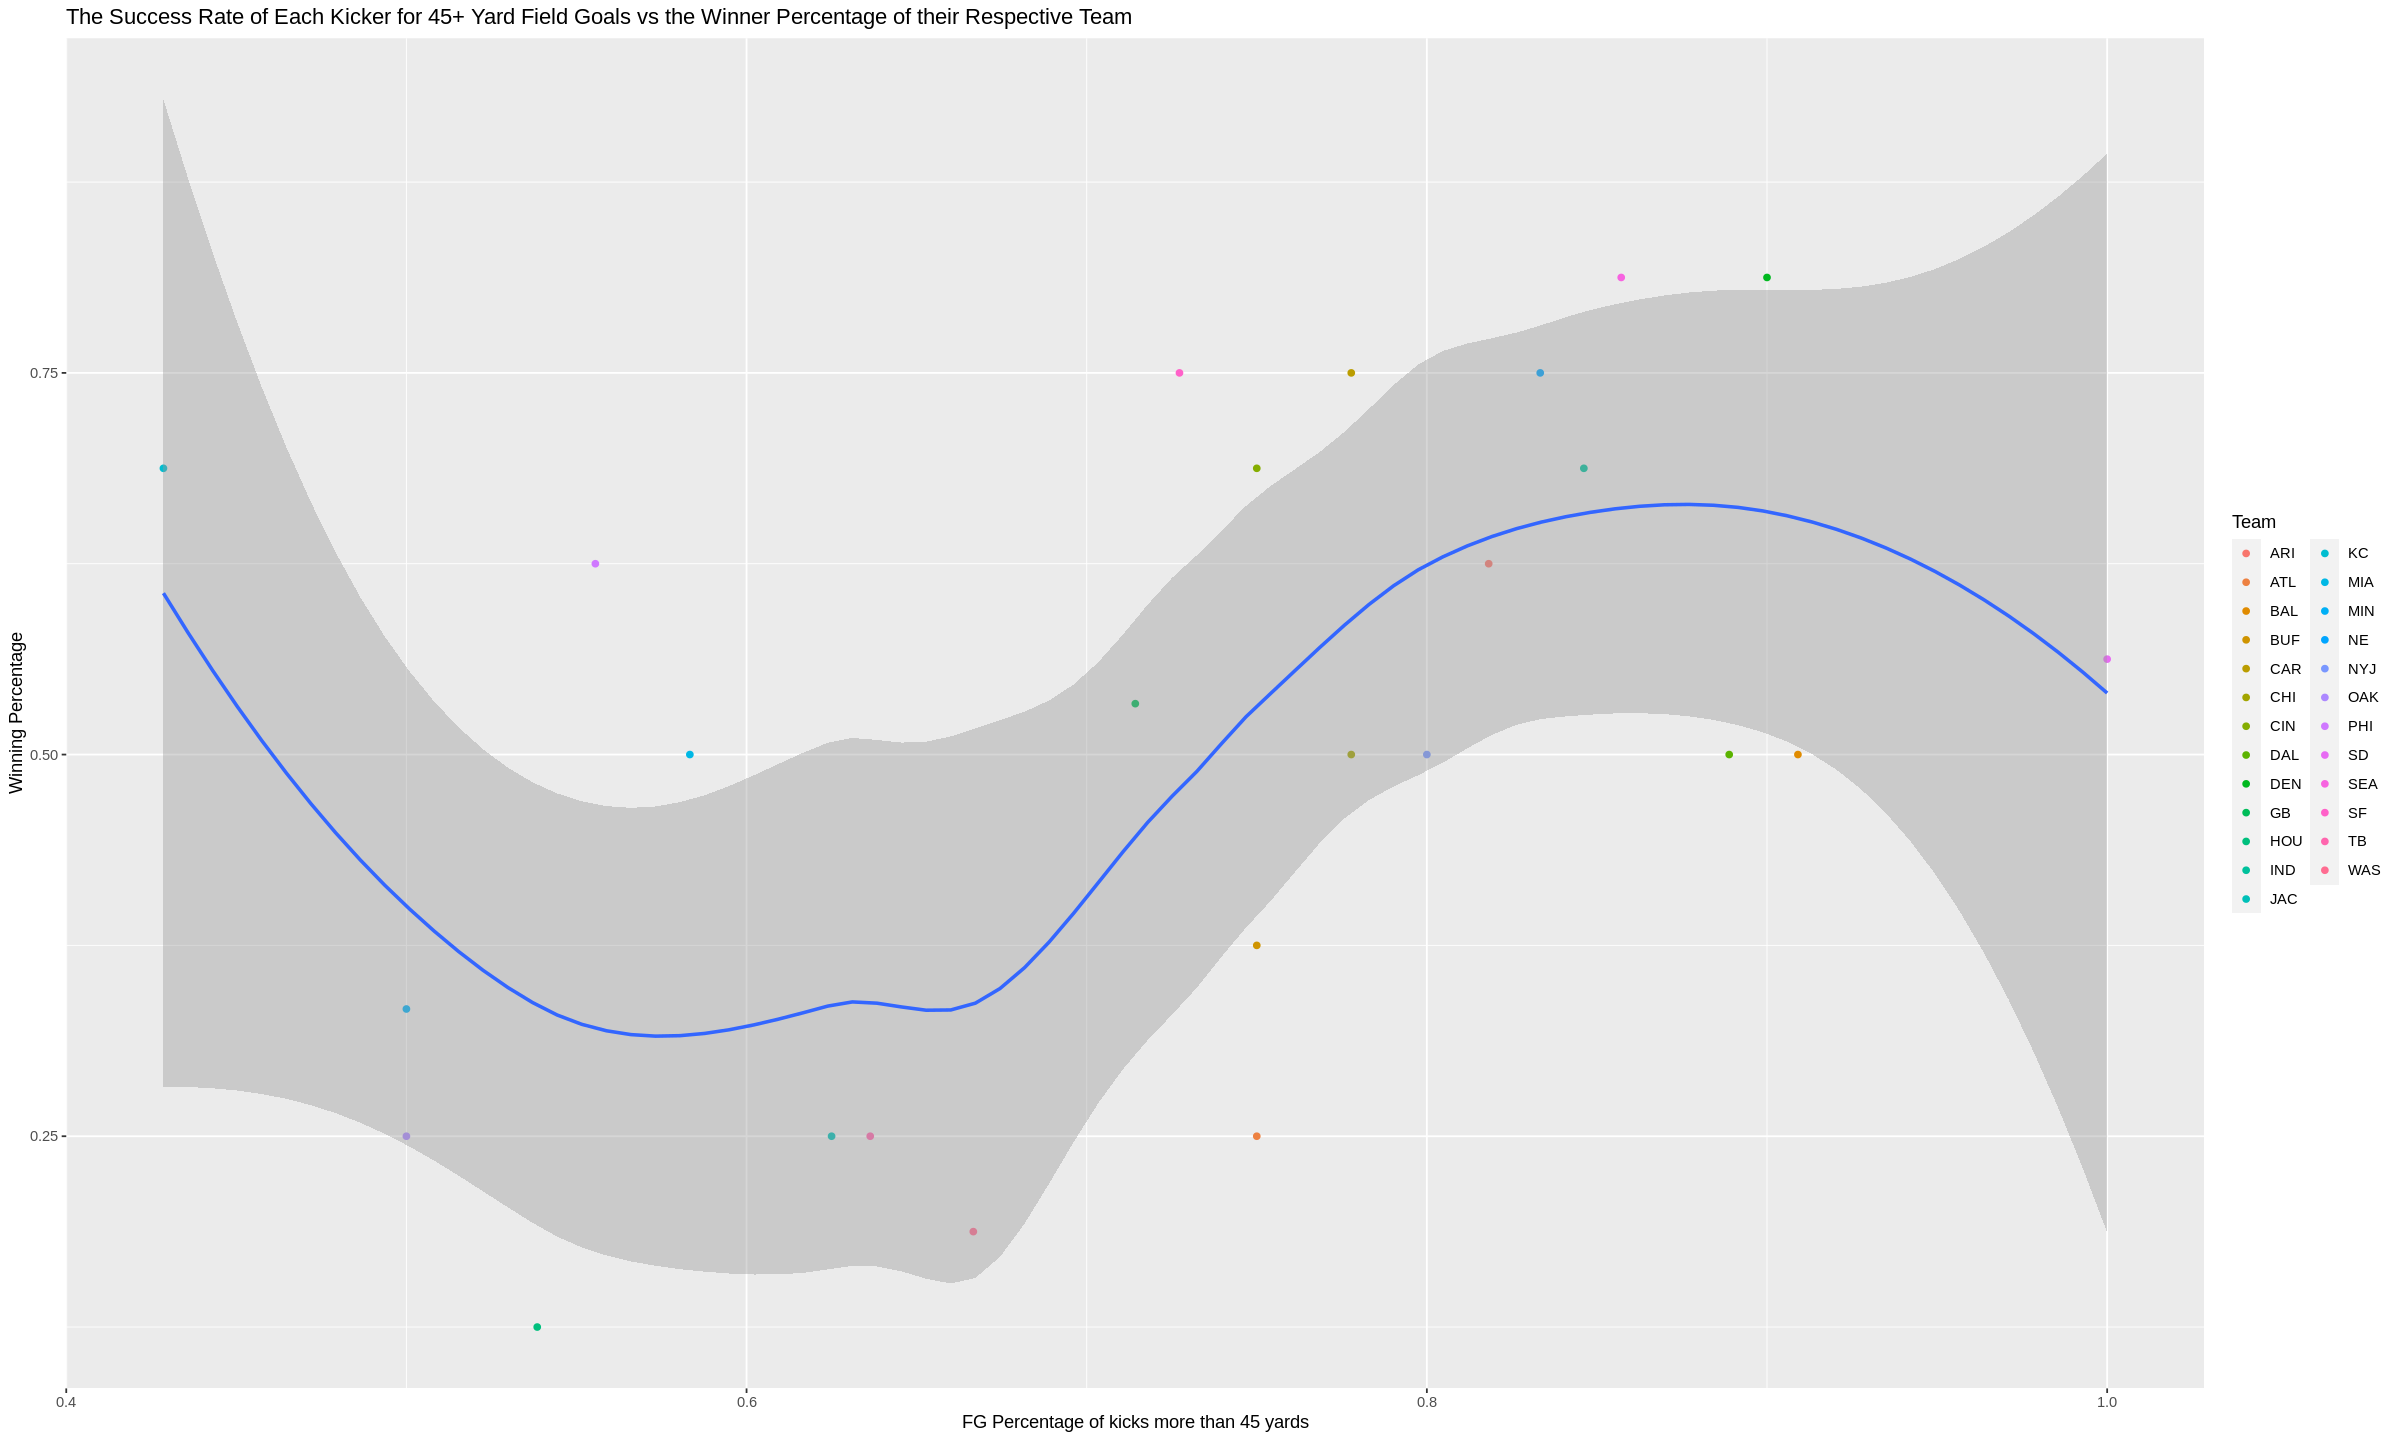

In [ ]:
kickers35 = plays %>% select(kicker_player_name,field_goal_attempt,field_goal_result,posteam,kick_distance) %>%
            filter(field_goal_attempt==1,kick_distance > 45)


kickers_makes2 = kickers35 %>%
mutate(FG_Made = case_when(field_goal_result == 'made' ~ 1,
      field_goal_result == 'missed' | field_goal_result =='blocked' ~ 0)) %>%
      filter(!is.na(field_goal_result))  %>% group_by(kicker_player_name,FG_Made,posteam) %>%
      summarize(n = n()) %>% filter(FG_Made==1)

kickers_attempts2 = kickers35 %>%
mutate(FG_Made = case_when(field_goal_result == 'made' ~ 1,
      field_goal_result == 'missed' | field_goal_result =='blocked' ~ 0)) %>%
      filter(!is.na(field_goal_result))  %>% group_by(kicker_player_name,posteam) %>%
      summarize(n = n())

Joining2 = left_join(kickers_makes2,kickers_attempts2,by="kicker_player_name") %>%
rename(FG_Makes = n.x,FG_Attempts = n.y,
            kicker = kicker_player_name,Team =posteam.x) %>% mutate(FG_Misses = FG_Attempts - FG_Makes,
            FG_Percentage = FG_Makes / FG_Attempts) %>%
  select(kicker,FG_Makes,FG_Misses,FG_Attempts,FG_Percentage,Team) %>% arrange(desc(FG_Percentage)) %>%
  filter(FG_Attempts > 5)

Total2 =left_join(Joining2,Records,by="Team") %>% select(Team,kicker,FG_Makes,FG_Misses,FG_Attempts,FG_Percentage,winning_pct) %>%
    print

summary(lm(formula = winning_pct ~ FG_Percentage, data = Total2))
ggplot(Total2) + geom_point(aes(x=FG_Percentage,y=winning_pct,color=Team)) +
  geom_smooth(aes(x=FG_Percentage,y=winning_pct))  + labs(x = "FG Percentage of kicks more than 45 yards",y="Winning Percentage",
                                                          title="The Success Rate of Each Kicker for 45+ Yard Field Goals vs the Winner Percentage of their Respective Team")


Above, I also looked into the relationship between NFL kickers' success with field goals of at least 46 yards and their teams' winning percentage. I used the same methods that were outlined above, but when applying a linear regression model, I found that about 16.85% of the variation can be accounted for by this model. The p-value was also 0.02, which reveals that our data is significant and a linear relationship between NFL kickers' success with field goals of at least 46 yards and their teams' winning percentage exist. Also, for every increase in 1% of winning percentage, a kicker's FG percentage for kickers of at least 46 yards increased by about 63%.

In the scatterplot above, we can see that there is a weak positive relationship between NFL kickers' success with field goals of at least 46 yards and their teams' winning percentage. This proves that an NFL Team should put at least a little bit of their focus on obtaining the best kicker for their team, but not completely stress about it as the difference between the top tier kickers is low!

**What Can We Conclude?**

Primarily, we can see that there is a stronger positive relationship between a kicker's success rate with field goals longer than 45 yards and their team's winning percentage than using just all field goals. In my opinion, this makes a lot of sense because a team will be able to score more points generally if their kicker can kick longer fields goals more frequently. This is because the team will not be forced to go for it and potentially give up 3 points. Also, if a kicker can successfully kick longer field goals, the team will then have more confidence and the ability to take more shots down the offensive side of the field.

Moreover, there are some confounding variables that I need to take into account. One was the weather and seeing if the location of where a kicker played their games affected their success rate. Another confounding variable is the number of times a team goes for it on 4th down because then they will then kick fewer field goals! I am looking forward to potentially addressing these issues in the coming months!
